In [317]:
#Importing of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [318]:
#DATA LODING
leads=pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [319]:
# DUPLICATE CHECKING
sum (leads.duplicated(subset='Prospect ID'))==0

True

In [320]:
# Inspecting the data

leads.shape

(9240, 37)

In [321]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [322]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [323]:
# CLEANING OF THE DATA
leads=leads.replace ('Select',np.nan)

In [324]:
#Checking the null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
#Dropping of columns having more than 70%
leads.drop('Lead Profile', 'How did you hear about X Education', axis=1, inplace=True)

In [326]:
leads.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened


In [327]:
round(100*(leads.isnull().sum()/len(leads)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [328]:
# Checking of null values in each column
leads['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

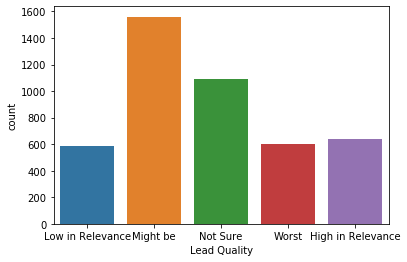

In [329]:
sns.countplot(leads['Lead Quality'])
plt.show

In [330]:
# the Blanks can be imputed with "Not sure" since Not sure is having highest score and can be imputed with NaN 
leads['Lead Quality'] = leads['Lead Quality'].replace(np.nan, 'Not Sure')

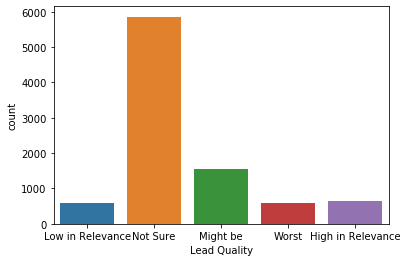

In [331]:
sns.countplot(leads['Lead Quality'])

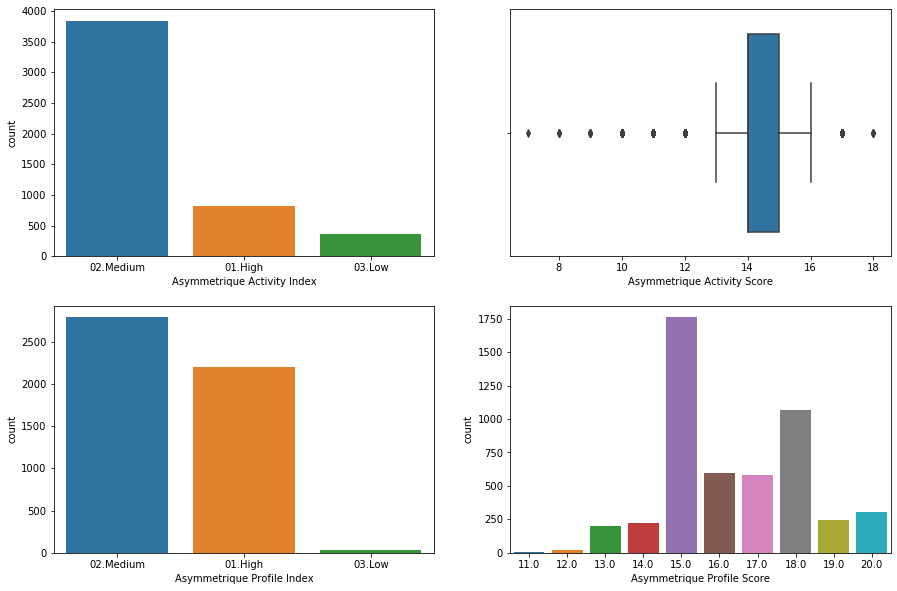

In [332]:
# Now plotting the graphs with null values count having next to "Lead Quality"

fig, axs = plt.subplots(2,2, figsize = (15,10))
plot1=sns.countplot(leads["Asymmetrique Activity Index"], ax = axs[0,0])
plot2=sns.boxplot(leads["Asymmetrique Activity Score"], ax = axs[0,1])
plot3=sns.countplot(leads["Asymmetrique Profile Index"], ax = axs[1,0])
plot4=sns.countplot(leads["Asymmetrique Profile Score"], ax = axs[1,1])
plt.show()

In [333]:
leads = leads.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

In [334]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [335]:
#Dropping of columns having more than 70%
leads.drop('Lead Profile', axis=1, inplace=True)

In [336]:
leads.drop('How did you hear about X Education', axis=1, inplace=True)

In [337]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [338]:
# Describing the city details
leads.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

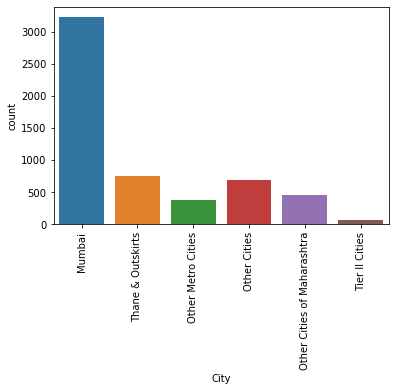

In [339]:
#Visualization of city details

sns.countplot(leads.City)
plt.xticks (rotation=90)


In [340]:
# Mumbai shows the higher data in city column, hence missing values can be imputed with mumbai
leads['City']=leads['City'].replace(np.nan, 'Mumbai')

In [341]:
# Describing the Specialization details
leads.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

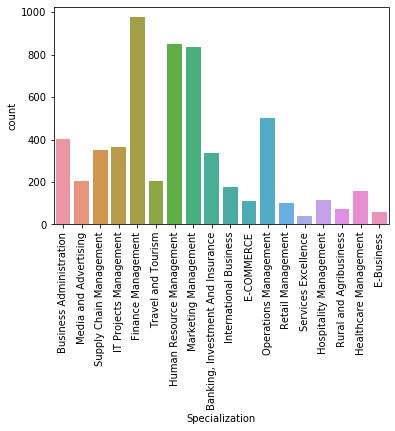

In [342]:
#Visualization of specialization details

sns.countplot(leads.Specialization)
plt.xticks (rotation=90)


In [343]:
# Finance Management shows the higher data in Specialization column, hence missing values can be imputed with 
#Finance Management

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Finance Management')

In [344]:
# Describing the Tags details
leads.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

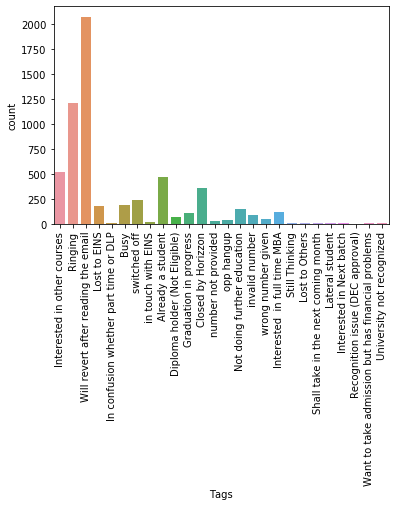

In [345]:
#Visualization of Tags details

sns.countplot(leads.Tags)
plt.xticks (rotation=90)

In [346]:
# Will revert after reading the emails shows the higher data in Specialization column, 
#hence missing values can be imputed with this

leads['Tags'] = leads['Tags'].replace(np.nan, 'Will revert after reading the email')

In [347]:
# Describing the What matters most to you in choosing a course details
leads ['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [348]:
# "Better Career Prospects" shows the higher data, hence "What matters most to you in choosing a course" 
# can be imputed with this.

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [349]:
# Describing the details of "Occupation"
leads ['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [350]:
# "Unemployed" shows the higher data, hence "What is your current occupation" can be imputed with this.

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [351]:
# Describing the details of "Country"
leads.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text xticklabel objects>)

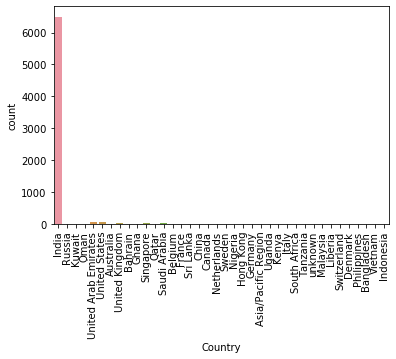

In [352]:
#plotting of Country details

sns.countplot(leads.Country)
plt.xticks (rotation=90)

In [353]:
# "India" shows the higher data in country section, hence missing values can be imputed with India

leads['Country'] = leads['Country'].replace(np.nan, 'India')

In [354]:
# Now missing values are below 2%, hence we can drop these
leads.dropna(inplace = True)

In [355]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [356]:
#The above data is clean and does not have any missing values

In [357]:
#Univariate Analysis
# Since "Converted" variable has values of 0 & 1 needs to identify the conversion
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

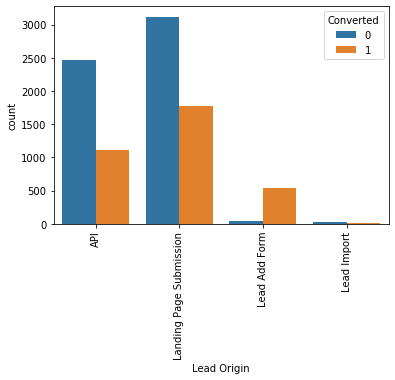

In [358]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

In [359]:
# Inference from the above:
#API and Landing page submission have less conversions, Lead add form has 95% conversion 
# Lead import are significantly less to be improved


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

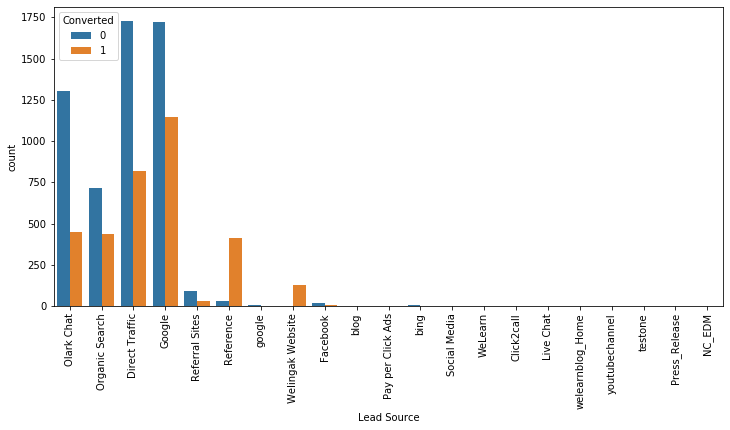

In [360]:
#Lead source evaluation
fig = plt.figure(figsize = (12,5.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

In [361]:
#Inference:
#Google and Direct traffic generates high source for leads.
#Conversion Rate of reference leads and leads through welingak website is high.
# improvement is required on lead converion of olark chat, organic search, direct traffic, 
#and google generate more leads from reference and welingak website.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

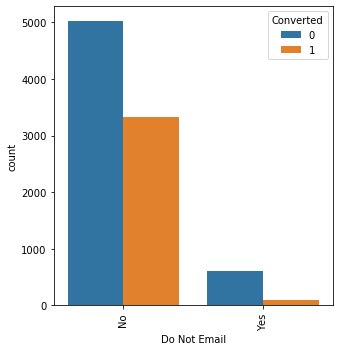

In [362]:
# Evaluation on "Do Not Email" 
fig = plt.figure(figsize = (5,5.5))
sns.countplot("Do Not Email", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

#Inference:
# Parameters with "No updates" are high compared to "Yes"

(array([0, 1]), <a list of 2 Text xticklabel objects>)

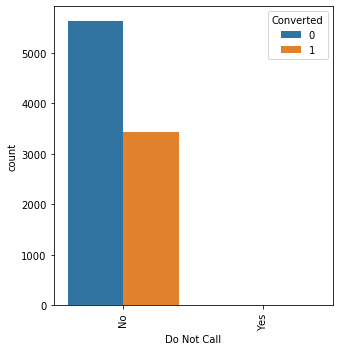

In [363]:
# Evaluation on "Do Not Call" 
fig = plt.figure(figsize = (5,5.5))
sns.countplot("Do Not Call", hue = "Converted", data = leads)

plt.xticks(rotation = 90)

In [364]:
leads ['Lead Source'].describe()

count       9074
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

In [365]:
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

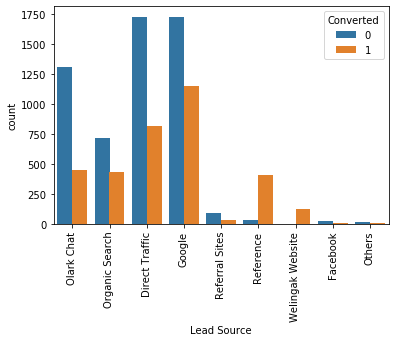

In [366]:
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

In [367]:
#Inference: Google and Direct traffic generates maximum number of leads.
#Conversion Rate of reference leads and leads through welingak website is high.

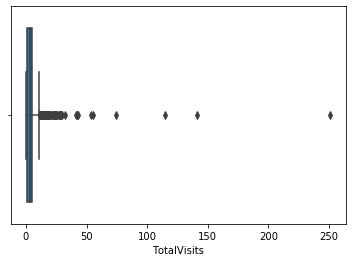

In [368]:
#Evaluation of total visits
sns.boxplot(leads['TotalVisits'])

# the below box plot 

In [369]:
#shows the outliers data are very high

In [370]:
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

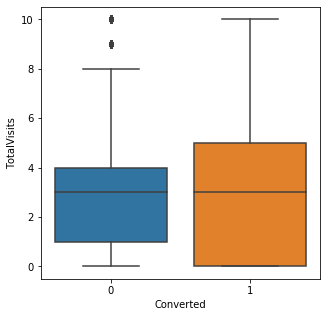

In [371]:
##Visualizing the data
fig = plt.figure(figsize = (5,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)

#Median for both the converted and not converted leads are same

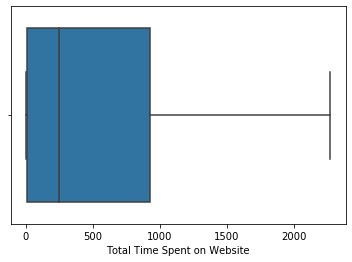

In [372]:
#Total time spent on website
sns.boxplot(leads['Total Time Spent on Website'])

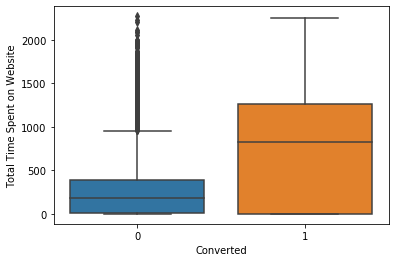

In [373]:
##Visualizing the data

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
#Inference: below inference shows Leads spending more time on the weblise are more likely to be converted.

In [374]:
#Page views per visit
leads['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

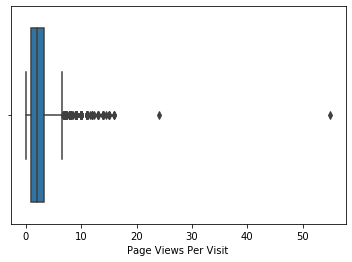

In [375]:
sns.boxplot(leads['Page Views Per Visit'])

# there are a number of outliers in the below sshown data.

In [376]:
#cap the outliers to 95% value for analysis.
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

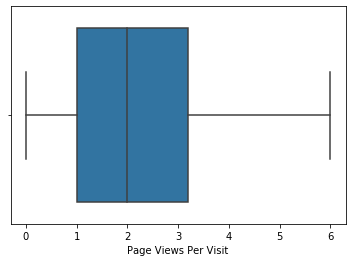

In [377]:
##Visualizing the data
sns.boxplot(leads['Page Views Per Visit'])

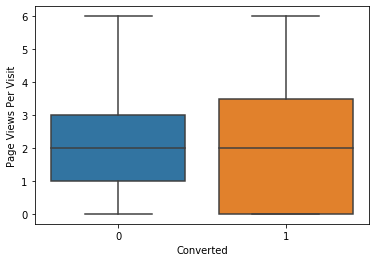

In [378]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
#Median for both the converted and not converted leads are same

In [379]:
#Last activity:
leads['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

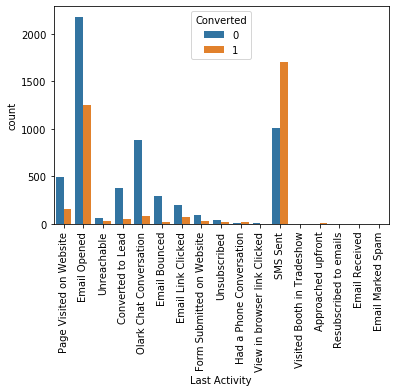

In [380]:
#Visualizing the data
, axs = plt.subplots(figsize = (12,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

In [381]:
# Since in the "last activities" many parameters doesnt have the value added and required to club to "Other_Activity"
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 
                                                        'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

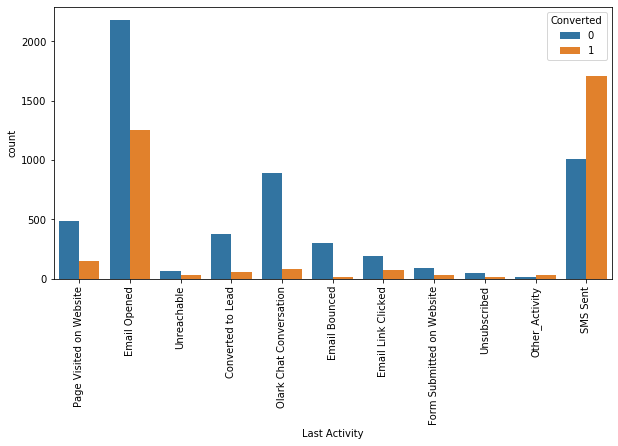

In [382]:
#Visualizing the data
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

In [383]:
#Inference: Many of the lead have opened emails as their last activity and Conversion rate for leads with 
#last activity as SMS Sent is almost 60%.b

In [384]:
#Specialization evaluation:
leads.Specialization.describe()

#Inference: Most values are 'InFinance management', hence specific inference can be drawn

count                   9074
unique                    18
top       Finance Management
freq                    4241
Name: Specialization, dtype: object

In [385]:
# Occupation:
leads['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

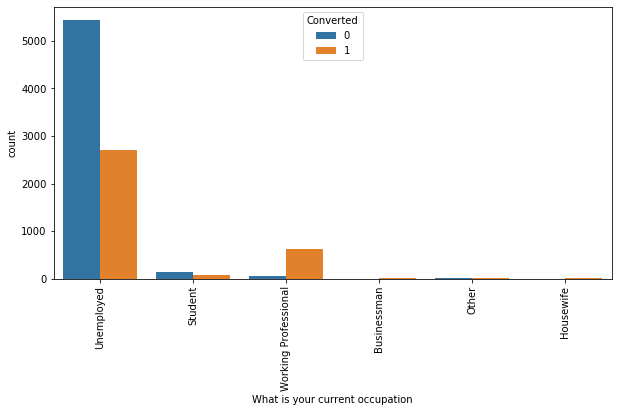

In [386]:
#Visualizing the data
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

#Inference: Working Professionals have high chances of joining the course.
#Unemployed persons are the highest in numbers.

In [387]:
leads.Tags.describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

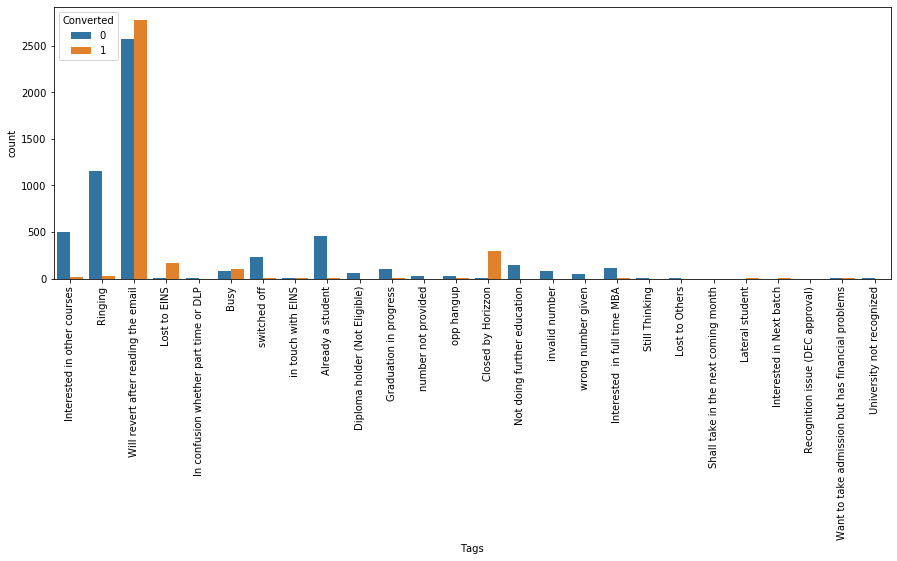

In [388]:
#Visualizing the data
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

#Inference: Tags having most of the unwanted parameters which can be clubbed to other_activity

In [389]:
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

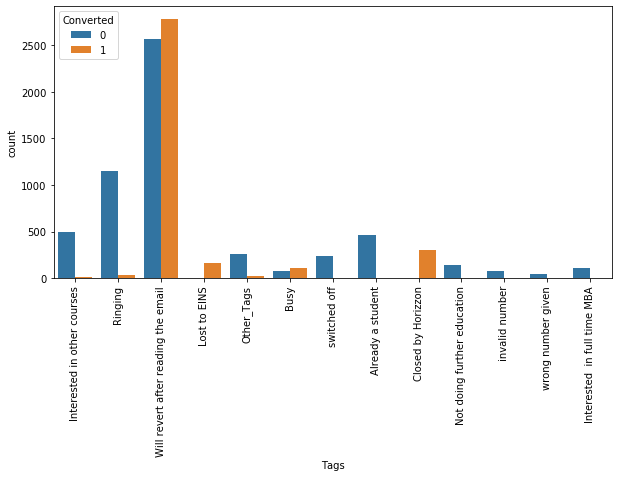

In [390]:
#Visualizing the data
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

#Inference: will revert after reading the emails are in high in numbers which are not converted

In [391]:
leads.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

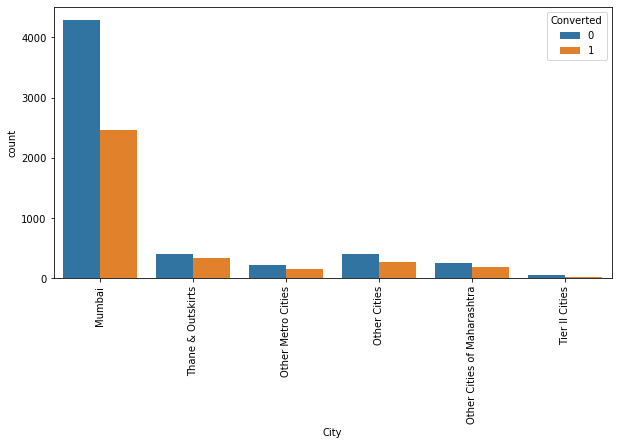

In [392]:
#Visualizing the data
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

#Inference: Most leads are from mumbai with around 30% conversion rate.

In [393]:
leads['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

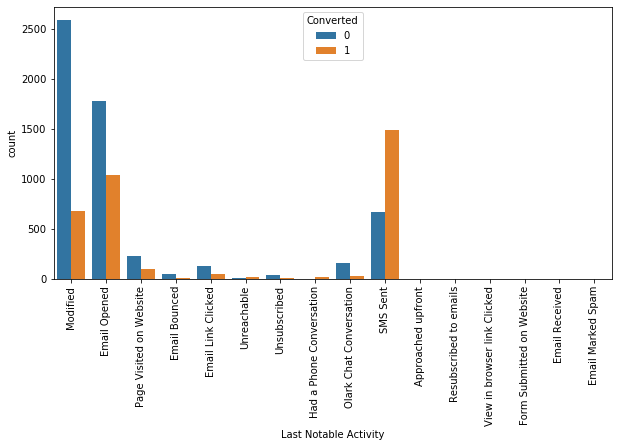

In [394]:
#Visualizing the data

fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 90)

#Results: Based on the univariate analysis we have seen that many columns are not adding any 
#information to the model, heance we can drop them for frther analysis

In [395]:
leads = leads.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country'],1)

In [396]:
leads.shape

(9074, 16)

In [397]:
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [398]:
#Preparation of data:
#Converting  binary variables (Yes/No) to 1/0
varlist =  ['Do Not Email', 'Do Not Call']
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
leads[varlist] = leads[varlist].apply(binary_map)

In [399]:
#Creating dummy variables:

dummy_var = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [400]:
# Adding the results to the  dataframe
leads = pd.concat([leads, dummy_var], axis=1)
leads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [401]:
#Dropping the columns for which dummies were created
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity', 'Tags', 'Lead Quality'], axis = 1)

In [402]:
leads.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [403]:
#Splitting the data into train and test set.
#Assigning of variable to X
X = leads.drop(['Prospect ID','Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [404]:
# Assigning variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [405]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [406]:
scaler = StandardScaler()

X_train[['TotalVisits',
         'Total Time Spent on Website',
         'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                'Total Time Spent on Website',
                                                                'Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [407]:
# Checking the Lead Conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

#Inference: 38% lead conversion rate.

37.85541106458012

In [408]:
#Feature Selection Using RFE
logreg = LogisticRegression()

In [409]:
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [410]:
rfe.support_

array([ True, False, False,  True, False, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False])

In [411]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 23),
 ('TotalVisits', False, 35),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 46),
 ('Lead Source_Google', False, 37),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 38),
 ('Lead Source_Others', False, 40),
 ('Lead Source_Reference', False, 59),
 ('Lead Source_Referral Sites', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity_Email Opened', False, 55),
 ('Last Activity_Form Submitted on Website', False, 54),
 ('Last Activity_Olark Chat Conversation', False, 8),
 ('Last Activity_Other_Activity', False, 3),
 ('Last Activity_Page Visited on Website', False, 36),
 ('Last Activity_SMS Sent', Fal

In [412]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [413]:
#Model Building
#Assessing the model with StatsModels
#Model-1
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1327.8
Date:                Sun, 13 Jun 2021   Deviance:                       2655.5
Time:                        16:10:17   Pearson chi2:                 2.49e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6945      0.241     -7.019      0.000      -2.168      -1.221
Do Not Email                                            -1.2264      0.243     -5.047      0.000      -1.703      -0.750
Total Time Spent on Website                              1.1552      0.061     18.869      0.000       1.035       1.275
Lead Origin_Lead Add Form                                2.3009      0.370      6.218      0.000       1.576       3.026
Lead Origin_Lead Import                                  1.7725      0.770      2.303      0.021       0.264       3.281
Lead Source_Olark Chat                                   1.1322      0.140      8.101      0.000       0.858       1.406
Lead Source_Welingak Website                             3.4235      0.831      4.120      0.000       1.795       5.052
What is your current occupation_Working Professional     1.2901      0.326      3.954      0.000       0.651       1.930
Tags_Busy                                                3.1633      0.341      9.277      0.000       2.495       3.832
Tags_Closed by Horizzon                                  7.9198      0.792      9.995      0.000       6.367       9.473
Tags_Lost to EINS                                        8.8025      0.768     11.462      0.000       7.297      10.308
Tags_Ringing                                            -2.0242      0.356     -5.694      0.000      -2.721      -1.327
Tags_Will revert after reading the email                 3.4936      0.242     14.429      0.000       3.019       3.968
Tags_invalid number                                    -23.7006   2.22e+04     -0.001      0.999   -4.35e+04    4.34e+04
Tags_switched off                                       -2.7649      0.635     -4.356      0.000      -4.009      -1.521
Tags_wrong number given                                -23.3363   3.01e+04     -0.001      0.999   -5.91e+04    5.91e+04
Lead Quality_Not Sure                                   -3.1401      0.141    -22.335      0.000      -3.416      -2.865
Lead Quality_Worst                                      -4.0228      0.838     -4.803      0.000      -5.664      -2.381
Last Notable Activity_Modified                          -0.9913      0.120     -8.260      0.000      -1.227      -0.756
Last Notable Activity_Olark Chat Conversation           -1.6347      0.408     -4.005      0.000      -2.435      -0.835
Last Notable Activity_SMS Sent                           2.2589      0.139     16.253      0.000       1.986       2.531
========================================================================================================================
"""

In [415]:
#Since Pvalue of 'Tags_invalid number & Tags_wrong number given' is very high, we can drop this column.
col = col.drop('Tags_invalid number')

In [416]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1335.7
Date:                Sun, 13 Jun 2021   Deviance:                       2671.5
Time:                        16:10:51   Pearson chi2:                 2.44e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9502      0.241     -8.104      0.000      -2.422      -1.479
Do Not Email                                            -1.2091      0.242     -4.994      0.000      -1.684      -0.735
Total Time Spent on Website                              1.1529      0.061     18.911      0.000       1.033       1.272
Lead Origin_Lead Add Form                                2.3477      0.373      6.296      0.000       1.617       3.079
Lead Origin_Lead Import                                  1.7144      0.750      2.287      0.022       0.245       3.184
Lead Source_Olark Chat                                   1.1338      0.139      8.136      0.000       0.861       1.407
Lead Source_Welingak Website                             3.3660      0.831      4.049      0.000       1.737       4.995
What is your current occupation_Working Professional     1.3482      0.331      4.076      0.000       0.700       1.997
Tags_Busy                                                3.4300      0.338     10.137      0.000       2.767       4.093
Tags_Closed by Horizzon                                  8.1437      0.793     10.272      0.000       6.590       9.698
Tags_Lost to EINS                                        9.0244      0.768     11.753      0.000       7.520      10.529
Tags_Ringing                                            -1.7371      0.351     -4.950      0.000      -2.425      -1.049
Tags_Will revert after reading the email                 3.7413      0.242     15.490      0.000       3.268       4.215
Tags_switched off                                       -2.4682      0.632     -3.908      0.000      -3.706      -1.230
Lead Quality_Not Sure                                   -3.1266      0.140    -22.326      0.000      -3.401      -2.852
Lead Quality_Worst                                      -3.8773      0.852     -4.552      0.000      -5.547      -2.208
Last Notable Activity_Modified                          -0.9840      0.120     -8.198      0.000      -1.219      -0.749
Last Notable Activity_Olark Chat Conversation           -1.6385      0.408     -4.019      0.000      -2.438      -0.840
Last Notable Activity_SMS Sent                           2.2136      0.137     16.149      0.000       1.945       2.482
========================================================================================================================
"""

In [417]:
#Checking for VIF values:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Lead Quality_Not Sure,3.27
11,Tags_Will revert after reading the email,3.20
15,Last Notable Activity_Modified,1.86
2,Lead Origin_Lead Add Form,1.82
17,Last Notable Activity_SMS Sent,1.70
4,Lead Source_Olark Chat,1.64
10,Tags_Ringing,1.55
1,Total Time Spent on Website,1.43
5,Lead Source_Welingak Website,1.37
6,What is your current occupation_Working Profes...,1.27


In [ ]:
#all the above variables having less VIF
#Since the Pvalues of all variables is 0 and VIF values are low for all the variables, 
#This model is our final model. 

In [433]:
#Making Prediction on the Train set
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.179427
1012    0.139556
9226    0.000458
4750    0.941186
7987    0.994983
1281    0.993705
2880    0.086941
4971    0.940578
7536    0.992972
1248    0.003485
dtype: float64

In [434]:
#Creating a dataframe with the actual Converted and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
3009,0,0.179427,3009
1012,0,0.139556,1012
9226,0,0.000458,9226
4750,1,0.941186,4750
7987,1,0.994983,7987


In [435]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [436]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
3009,0,0.179427,3009,0
1012,0,0.139556,1012,0
9226,0,0.000458,9226,0
4750,1,0.941186,4750,1
7987,1,0.994983,7987,1


In [437]:
# the Confusion matrix
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3702  203]
 [ 290 2156]]


In [438]:
# Predicted     not_converted    converted
# Actual
# not_converted        3702      203
# converted            209       2156  

In [439]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.9223744292237442


In [441]:
# Sensitivity of logistic regression model
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8814390842191333


In [444]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.9480153649167734


In [445]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.051984635083226635


In [447]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.913946587537092


In [448]:
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.9273547094188377


In [ ]:
# From the above data evaluation specifiction is found to be 94% & sensitivity is 88%